In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
import FinanceDataReader as fdr
samsung = fdr.DataReader('005930')

In [3]:
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-11-06,69800,70900,69300,70900,22228489,0.018678
2023-11-07,70600,70900,70000,70900,17228731,0.000000
2023-11-08,71300,71400,69700,69900,12901310,-0.014104
2023-11-09,69900,70800,69600,70300,12301373,0.005722
2023-11-10,70000,70500,69500,70500,9087721,0.002845


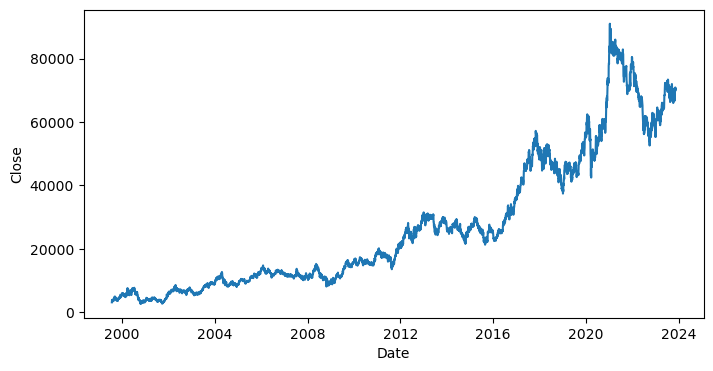

In [4]:
plt.figure(figsize=(8,4))
sns.lineplot(x=samsung.index, y='Close', data=samsung)
plt.show()

In [5]:
stock_code = '005930'

In [6]:
stock = fdr.DataReader(stock_code)

In [7]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-07-26,3120,3260,3060,3170,1212761,NaN
1999-07-27,3229,3399,3200,3370,910512,0.063091
1999-07-28,3409,3750,3390,3560,1952152,0.056380
1999-07-29,3699,3960,3570,3940,1661889,0.106742
1999-07-30,3939,4080,3740,3780,1945800,-0.040609


In [8]:
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-11-06,69800,70900,69300,70900,22228489,0.018678
2023-11-07,70600,70900,70000,70900,17228731,0.000000
2023-11-08,71300,71400,69700,69900,12901310,-0.014104
2023-11-09,69900,70800,69600,70300,12301373,0.005722
2023-11-10,70000,70500,69500,70500,9087721,0.002845


In [9]:
stock.index

DatetimeIndex(['1999-07-26', '1999-07-27', '1999-07-28', '1999-07-29',
               '1999-07-30', '1999-08-02', '1999-08-03', '1999-08-04',
               '1999-08-05', '1999-08-06',
               ...
               '2023-10-30', '2023-10-31', '2023-11-01', '2023-11-02',
               '2023-11-03', '2023-11-06', '2023-11-07', '2023-11-08',
               '2023-11-09', '2023-11-10'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

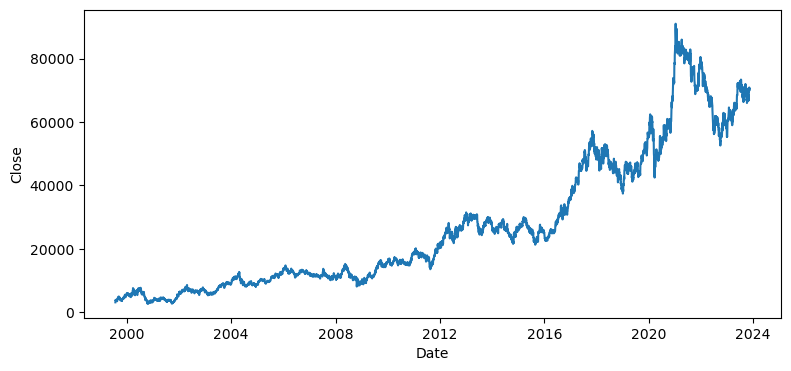

In [10]:
plt.figure(figsize=(9,4))
sns.lineplot(x=stock.index, y=stock['Close'])
plt.show()

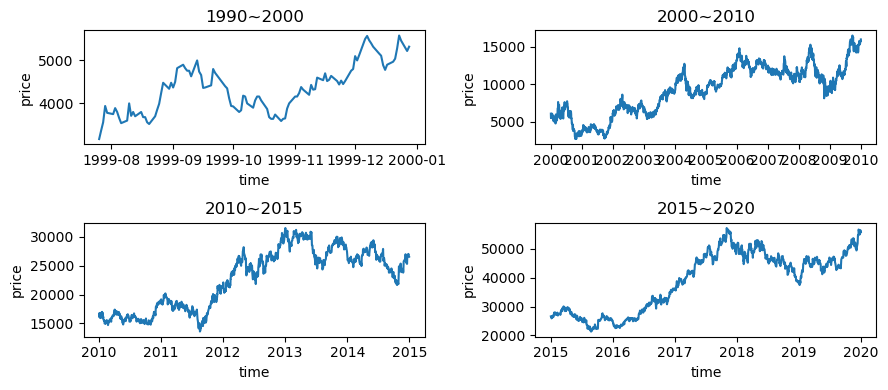

In [11]:
time_steps = [['1990', '2000'],
              ['2000', '2010'],
              ['2010', '2015'],
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(9, 4)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(x=df.index, y=df['Close'], ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [12]:
stock = fdr.DataReader(stock_code, '2023')

In [13]:
from prophet import Prophet
from prophet.plot import plot_plotly
from prophet.plot import plot_components_plotly

In [14]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-01-02,55500,56100,55200,55500,10031448,0.003617
2023-01-03,55400,56000,54500,55400,13547030,-0.001802
2023-01-04,55700,58000,55600,57800,20188071,0.043321
2023-01-05,58200,58800,57600,58200,15682826,0.006920
2023-01-06,58300,59400,57900,59000,17334989,0.013746


In [15]:
stock['y'] = stock['Close']
stock['ds'] = stock.index

In [16]:
stock.head()

,Open,High,Low,Close,Volume,Change,y,ds
Date,,,,,,,,
2023-01-02,55500,56100,55200,55500,10031448,0.003617,55500,2023-01-02
2023-01-03,55400,56000,54500,55400,13547030,-0.001802,55400,2023-01-03
2023-01-04,55700,58000,55600,57800,20188071,0.043321,57800,2023-01-04
2023-01-05,58200,58800,57600,58200,15682826,0.006920,58200,2023-01-05
2023-01-06,58300,59400,57900,59000,17334989,0.013746,59000,2023-01-06


In [17]:
m = Prophet()
m.fit(stock)

18:15:27 - cmdstanpy - INFO - Chain [1] start processing
18:15:27 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
237,2023-12-06
238,2023-12-07
239,2023-12-08
240,2023-12-09
241,2023-12-10


In [19]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
237,2023-12-06,68237.191008,66793.246387,70944.157700,67621.628248,68874.463263,622.411188,622.411188,622.411188,622.411188,622.411188,622.411188,0.0,0.0,0.0,68859.602196
238,2023-12-07,68238.948908,66917.688534,71063.048798,67591.405963,68905.556848,711.295912,711.295912,711.295912,711.295912,711.295912,711.295912,0.0,0.0,0.0,68950.244820
239,2023-12-08,68240.706808,67197.151687,71397.021145,67539.702907,68964.638905,940.481520,940.481520,940.481520,940.481520,940.481520,940.481520,0.0,0.0,0.0,69181.188328
240,2023-12-09,68242.464707,64544.929411,68462.514618,67499.090879,68998.220139,-1732.185045,-1732.185045,-1732.185045,-1732.185045,-1732.185045,-1732.185045,0.0,0.0,0.0,66510.279663
241,2023-12-10,68244.222607,64467.041139,68605.174925,67455.791817,69024.904187,-1732.184744,-1732.184744,-1732.184744,-1732.184744,-1732.184744,-1732.184744,0.0,0.0,0.0,66512.037864


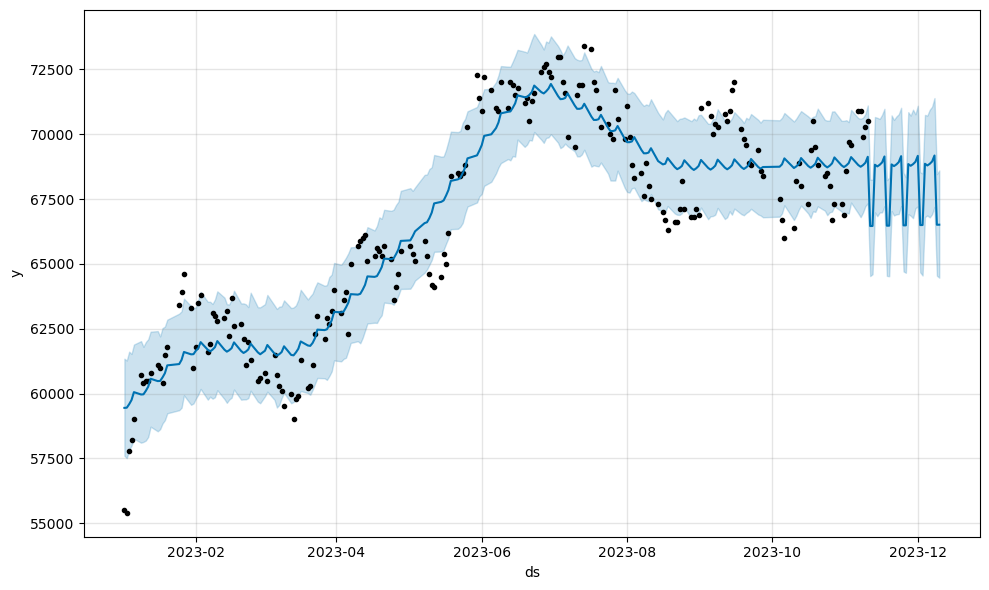

In [20]:
fig = m.plot(forecast)

In [21]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2023-01-02,59446.734190,57600.490916,61345.122315
1,2023-01-03,59453.043766,57505.772860,61272.746279
2,2023-01-04,59587.857965,57815.446580,61616.295521
3,2023-01-05,59750.508277,57989.872897,61526.278771
4,2023-01-06,60053.459474,58255.330750,61888.622278
...,...,...,...,...
237,2023-12-06,68859.602196,66793.246387,70944.157700
238,2023-12-07,68950.244820,66917.688534,71063.048798
239,2023-12-08,69181.188328,67197.151687,71397.021145
240,2023-12-09,66510.279663,64544.929411,68462.514618


In [22]:
fig = plot_plotly(m, forecast)

In [24]:
fig

In [25]:
plot_components_plotly(m, forecast)

In [26]:
from prophet.plot import add_changepoints_to_plot

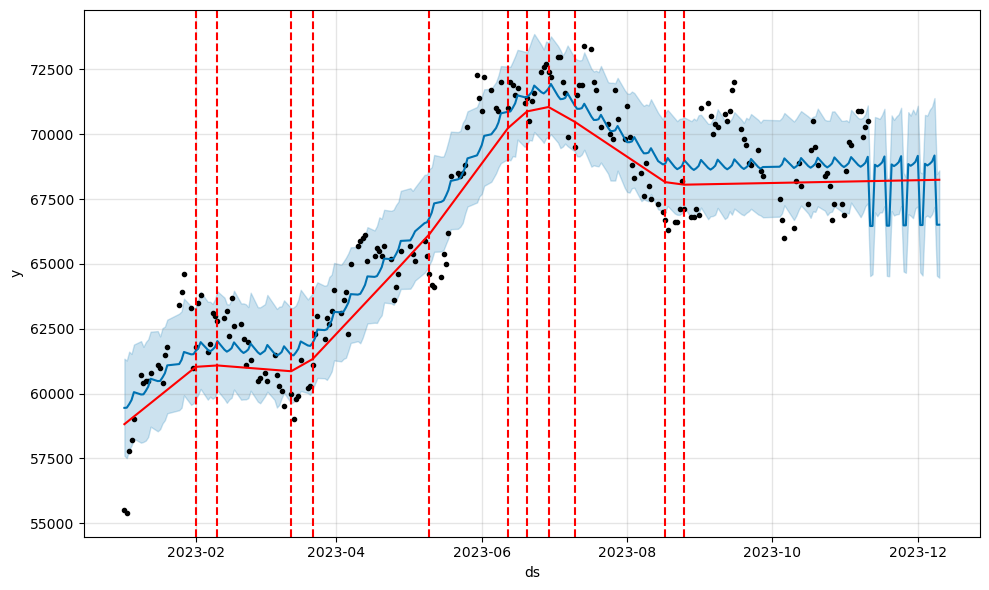

In [27]:
fig = m.plot(forecast)
points = add_changepoints_to_plot(fig.gca(), m, forecast)

18:21:45 - cmdstanpy - INFO - Chain [1] start processing
18:21:45 - cmdstanpy - INFO - Chain [1] done processing


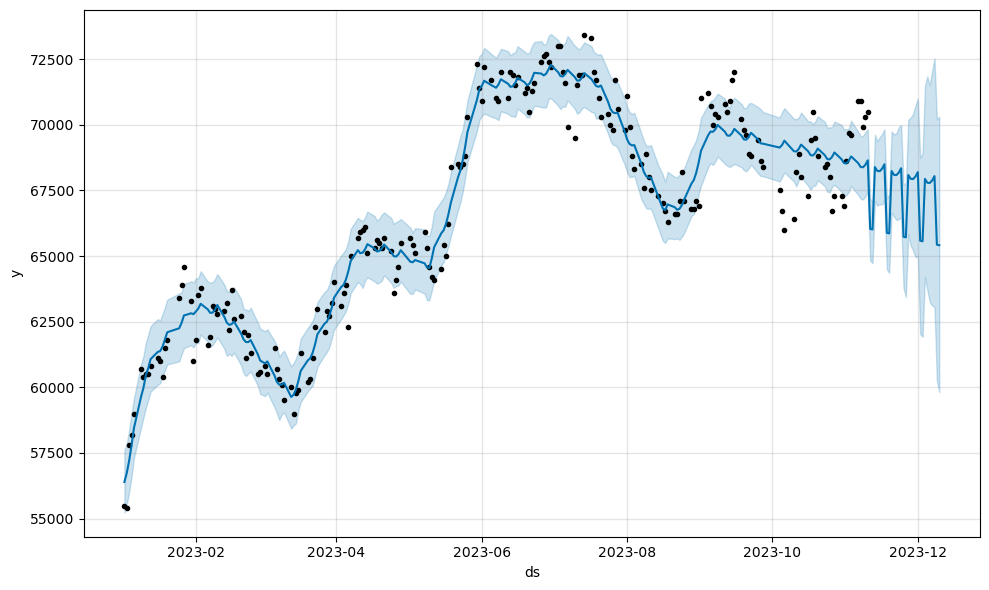

In [28]:
m = Prophet(changepoint_prior_scale=0.8)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)

18:21:56 - cmdstanpy - INFO - Chain [1] start processing
18:21:56 - cmdstanpy - INFO - Chain [1] done processing


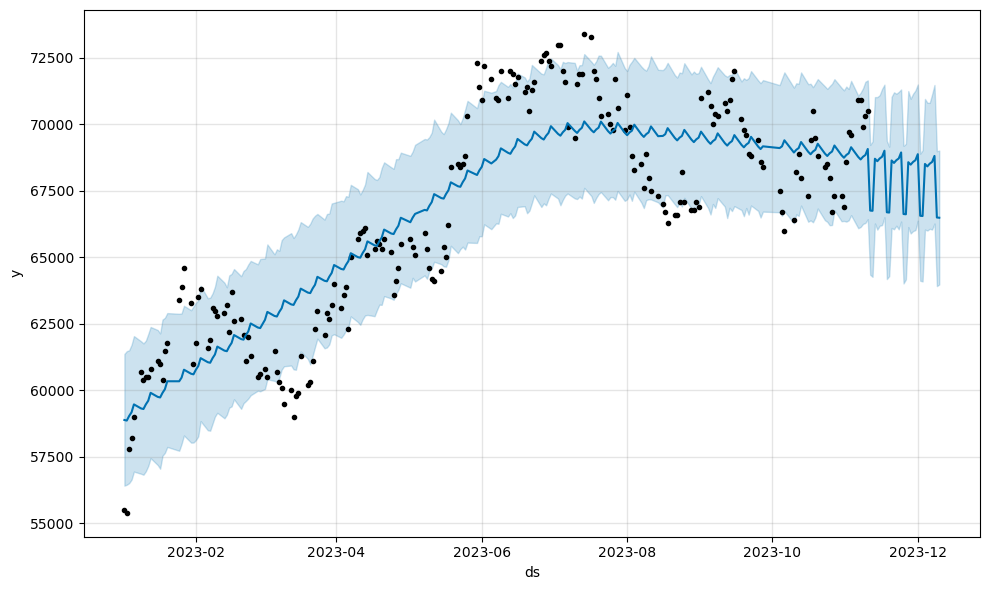

In [29]:
m = Prophet(changepoint_prior_scale=0.01)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)